# Решение тестового задания на позицию программист-стажер в "Business & Decision"

### Задание

Требуется создать для строки логический флаг, указывающий на наличие в любой строке ее группы определенного значения. Возьмем для примера студента, который сдает определенное количество экзаменов за определенный промежуток времени. Студент будет сдавать три экзамена за три месяца. Если он сдает один из этих экзаменов, требование считается удовлетворенным, и для выражения этого факта должен быть возвращен флаг. Если студент не сдает ни одного из трех экзаменов за трехмесячный период, должен быть возвращен дополнительный флаг, указывающий и на этот факт. Рассмотрим следующий пример входных данных:

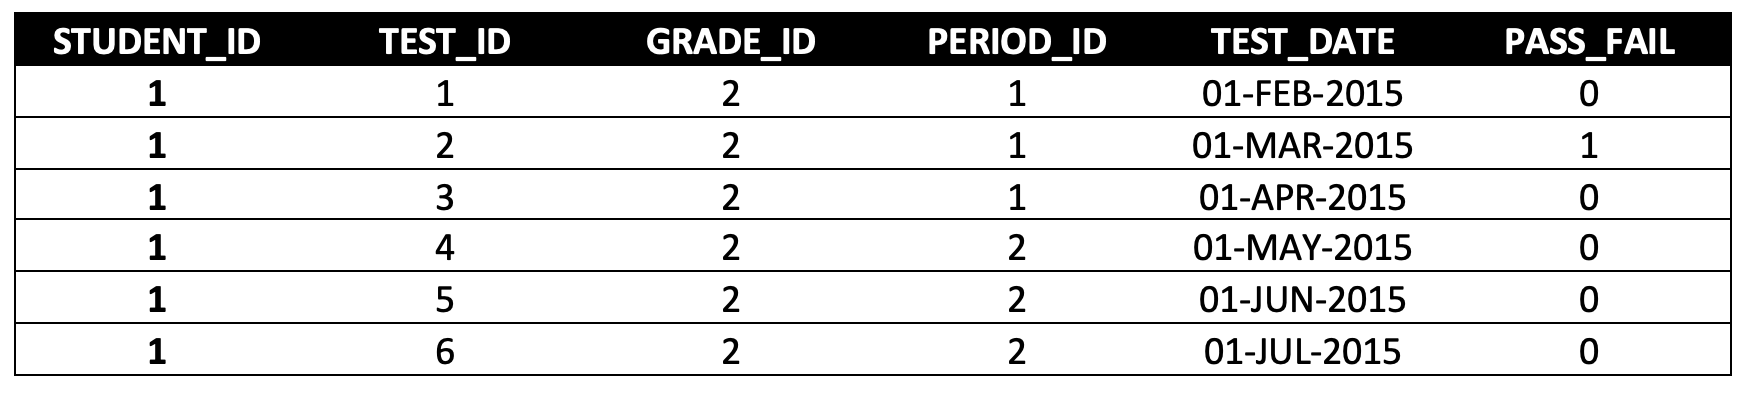

Рассмотрев приведенное выше результирующее множество, видим, что студент должен сдать шесть экзаменов за два трехмесячных периода. Студент сдал один экзамен (1 означает «сдал», 0 – «не сдал»), таким образом, требование удовлетворено для всего первого периода. Поскольку студент не сдал ни одного экзамена в течение второго периода (следующие три месяца), PASS_FAIL равен 0 для всех трех экзаменов. Хотелось бы получить результирующее множество, из которого видно, сдал ли студент хотя бы один экзамен за данный период. В итоге должно быть получено следующее результирующее множество:

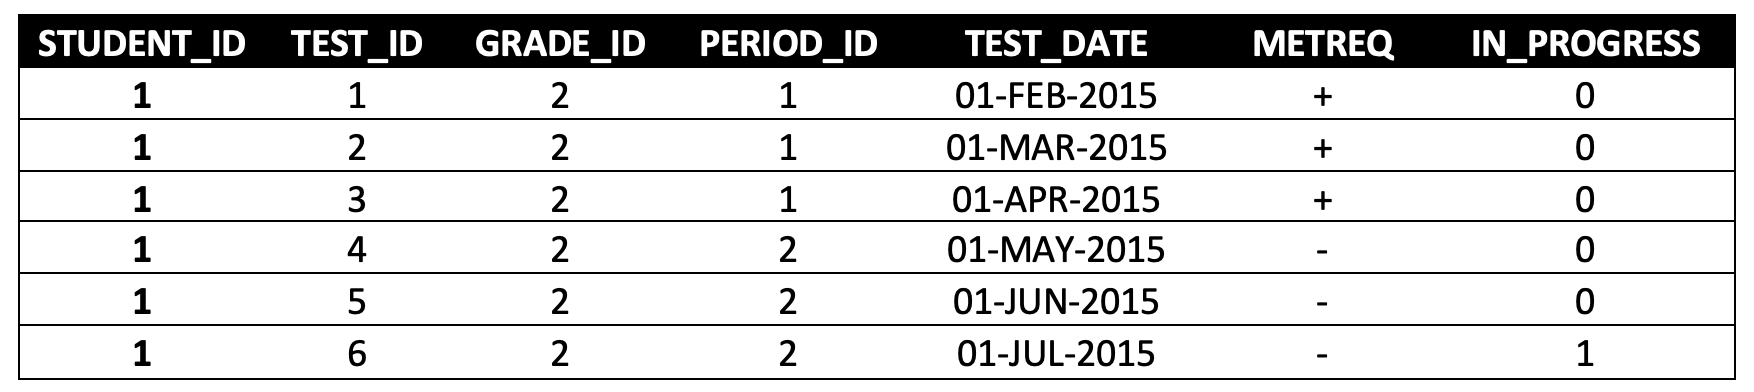

В столбце METREQ («met requirement») представлены значения «+» и «–», обозначающие, выполнил или нет студент требование о сдаче, по крайней мере, одного экзамена за период (три месяца) соответственно. Значение поля IN_PROGRESS должно быть равным 0, если студент уже сдал какой-то экзамен за данный период. Если студент не сдал ни одного экзамена, в поле IN_PROGRESS строки с датой последнего экзамена этого студента будет располагаться значение.

#### Примечание

- Ограничений по выбору СУБД нет, но желательно использовать одну из распространённых: Oracle, MS SQL, MySQL, PostgreeSQL, Teradata. 
- Просьба указать используемую СУБД.
- Решение должно представлять собой один SELECT запрос (подзапросы разрешены). 
- При решении задачи не использовать аналитические/оконные функции. (Конструкции вида … over( partition by… ))


### Решение

В приведенном решении используется СУБД MySQL.

В задании предстоит сымитировать работу оконных функций.

Далее в рассуждениях, набор строк, соответствующий группе столбцов STUDENT_ID, GRADE_ID и PERIOD_ID, будем называть *партицией*.


1. При помощи подзапроса и левостороннего соединения присоединяем к исходной таблице колонки METREQ_01 и LAST_DATE, где

- METREQ_01 - колонка, содержащая максимальное значение из колонки PASS_FAIL для каждой партиции. Таким образом, мы фиксируем наличие хотя бы одной единицы в поле PASS_FAIL. В случае, если конкретным студентом был сдан хотя бы один экзамен за конкретный период и грейт, то во всех соответствующих строках колонки METREQ_01 будет проставлена единица.


- LAST_DATE - колонка, содержащая последнюю дату экзамена в каждой партиции.

Таким образом, на примере входных данных из задания получается следующая промежуточная таблица

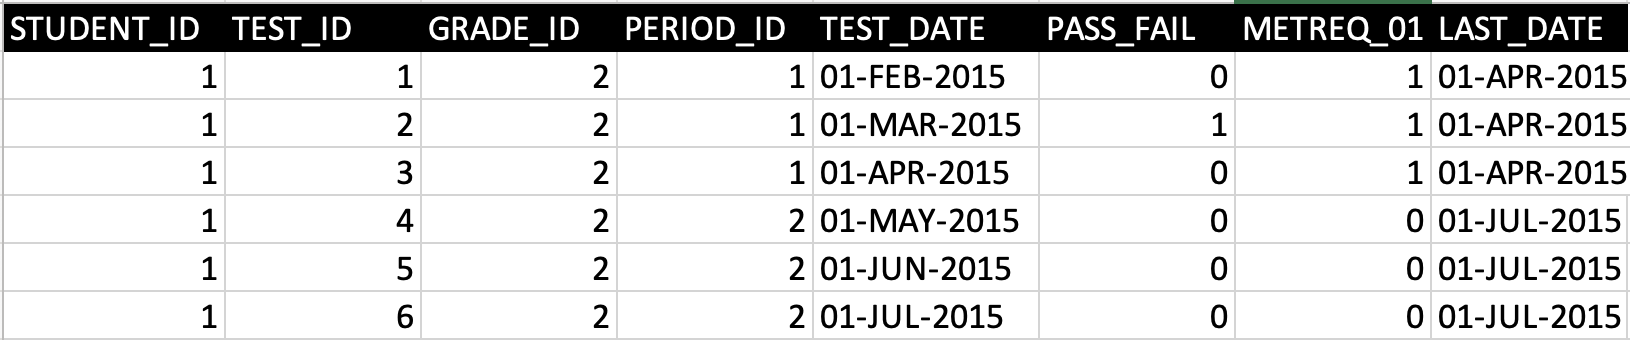

2. Далее мы выбираем нужные поля из промежуточной таблицы, а также создаем новые колонки
- METREQ на основе имеющейся колонки METREQ_01 "делаем замену": 1 -> +, 0 -> - (тк по заданию обозначения должны быть именно в знаках +-)

- IN_PROGRESS. В последних строках в колонке IN_PROGRESS каждой партиции будем ставить 1 в случае, если конкретным студентом не было сдано ни одного экзамена за конкретный период и грейт, в ином случае - 0. Логика заключается в том, что в колонке METREQ_01 внутри каждой партиции стоят одинаковые булевы значения. Тогда мы можем проверять только последнюю строку (строку с наибольшей датой) внутри партиции.

Итоговый запрос имеет следущющий вид

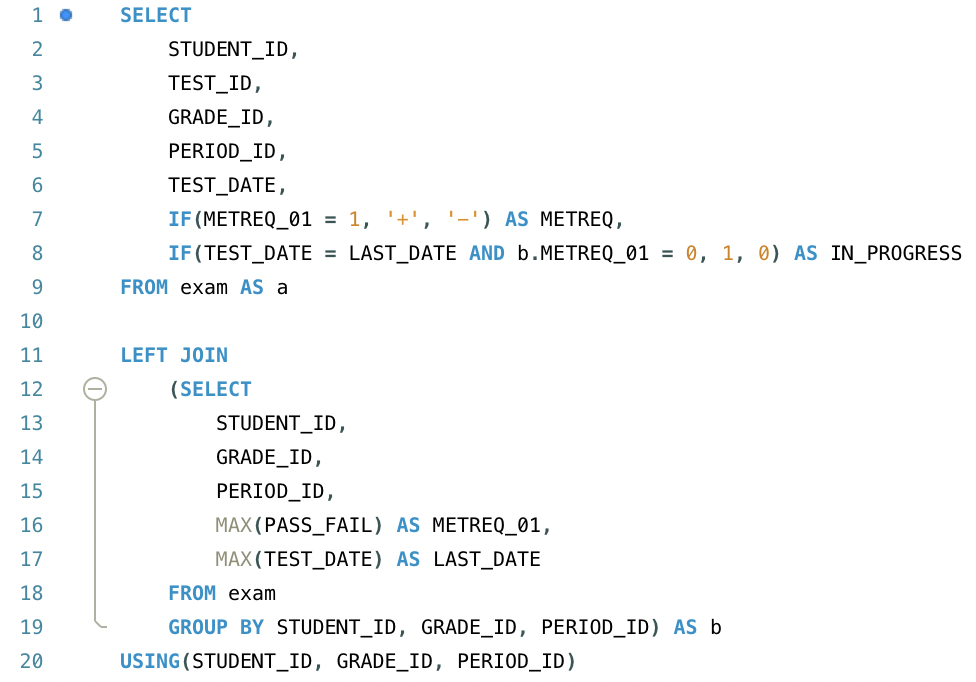

Файл с запросом и таблица с примером входных данных в формате sql прилагается

### Решение с использованием оконных функций 

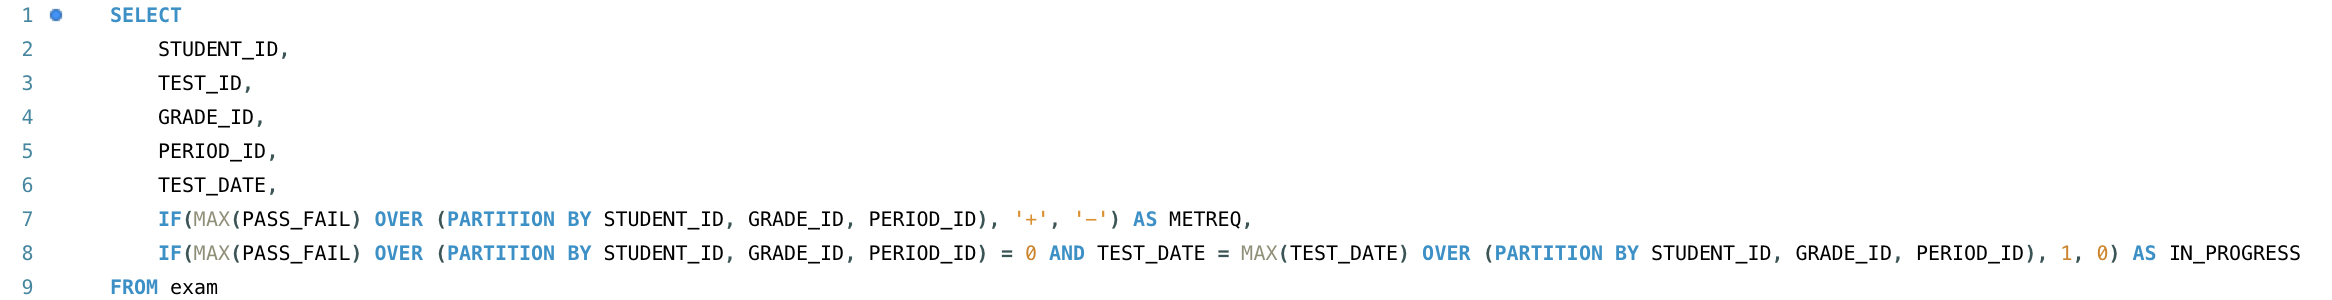

### Тест

Создадим базу данных "db", а затем в ней создадим таблицу "exam" и заполним ее тестовыми данными, приведенными в качестве примера в задании

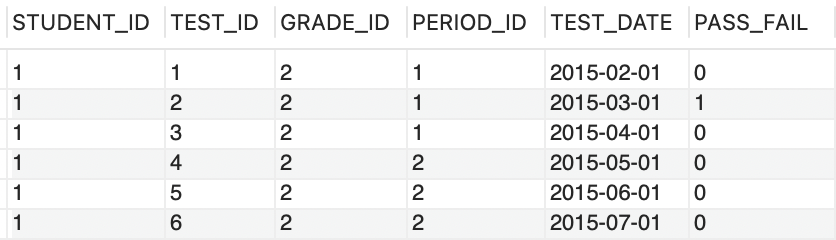

После выполнения обоих запросов получаем одинаковый результат, соответствующий требованиям задания

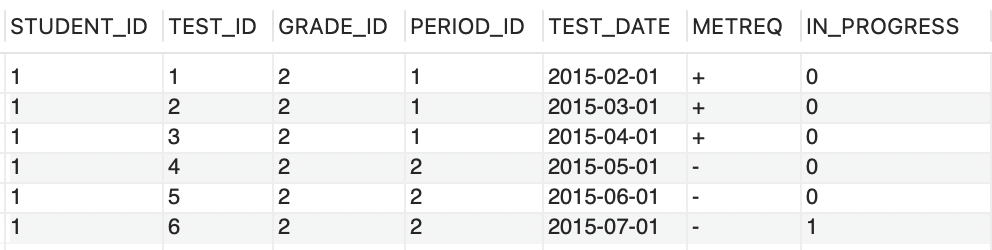

### Cравнение запросов

Известно, что sql-сервер способен самостоятельно оптимизировать запросы, поэтому перед выполнением запросов кэш был очищен.
В итоге я получила следующее время выполнения запросов, где
- 1 - запрос без использования оконных функций 
- 2 - запрос с использованием оконных функций

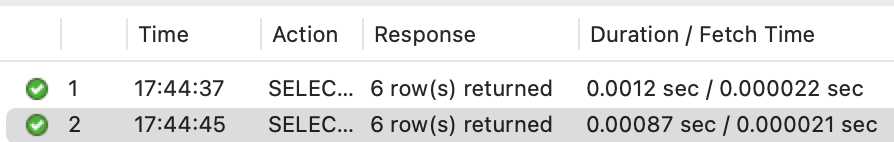


Можно заметить, что запрос с использованием оконных функций выполнился на 38% быстрее. На тестовом примере это не имеет большого значения, однако на данных с большим количеством строк такая разница становится существенной.

### Вывод
Для оптимального решения приведенной задачи, очевидно, требовалось применение оконных функций. Однако одно из дополнительных условий задачи - не использовать оконные функции. Я привела запрос как с использованием оконных функций, так и без них.

Можно заметить , что более громоздским и менее оптимизированным по времени оказался запрос без использования оконных функций. Однако такое решение стало отличным упражнением на владение SQL.